In [80]:
import yfinance as yf 
import pandas as pd 
import numpy as np 

In [81]:
ticker = ('IRCTC.NS')
start_date = "2023-01-01"
end_date = "2024-02-19"
data = yf.download(ticker,start=start_date,end=end_date)
print(data)


[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-02  643.000000  644.700012  639.099976  642.349976  634.539978   
2023-01-03  648.950012  654.799988  642.150024  644.049988  636.219299   
2023-01-04  646.000000  646.549988  633.000000  635.200012  627.476990   
2023-01-05  638.400024  638.400024  631.500000  637.150024  629.403198   
2023-01-06  637.349976  639.950012  631.000000  636.250000  628.514099   
...                ...         ...         ...         ...         ...   
2024-02-12  941.950012  947.000000  894.000000  900.099976  900.099976   
2024-02-13  900.099976  914.700012  877.000000  910.450012  910.450012   
2024-02-14  915.500000  934.000000  897.299988  929.200012  929.200012   
2024-02-15  938.450012  968.000000  935.200012  951.500000  951.500000   
2024-02-16  957.000000  959.849976  937.099

In [82]:
data.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-05,971.900024,972.799988,941.150024,946.650024,946.650024,3260389
2024-02-06,950.000000,968.400024,939.500000,965.250000,965.250000,2521842
2024-02-07,969.000000,972.599976,948.299988,954.750000,954.750000,1956892
2024-02-08,957.599976,958.549988,941.799988,944.349976,944.349976,1638646
2024-02-09,949.099976,954.400024,916.000000,939.150024,939.150024,2482688
2024-02-12,941.950012,947.000000,894.000000,900.099976,900.099976,3029950
2024-02-13,900.099976,914.700012,877.000000,910.450012,910.450012,3906213
2024-02-14,915.500000,934.000000,897.299988,929.200012,929.200012,4480920
2024-02-15,938.450012,968.000000,935.200012,951.500000,951.500000,4532823


In [83]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,278.000000,278.000000,278.000000,278.000000,278.000000,2.780000e+02
mean,691.765649,699.535614,682.845682,690.903775,687.550135,2.699616e+06
std,107.865500,111.207173,102.663405,106.803473,108.495933,4.140065e+06
min,563.000000,568.700012,557.099976,560.200012,556.419678,5.043900e+05
25%,626.225021,632.812485,621.737518,625.699997,620.993408,9.052722e+05
50%,647.375000,654.225006,641.199982,647.424988,642.042938,1.328104e+06
75%,703.949997,710.000000,696.612488,703.149994,700.912216,2.678489e+06
max,1045.050049,1046.900024,972.650024,983.799988,983.799988,3.749978e+07


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 278 entries, 2023-01-02 to 2024-02-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       278 non-null    float64
 1   High       278 non-null    float64
 2   Low        278 non-null    float64
 3   Close      278 non-null    float64
 4   Adj Close  278 non-null    float64
 5   Volume     278 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 15.2 KB


In [85]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# EDA

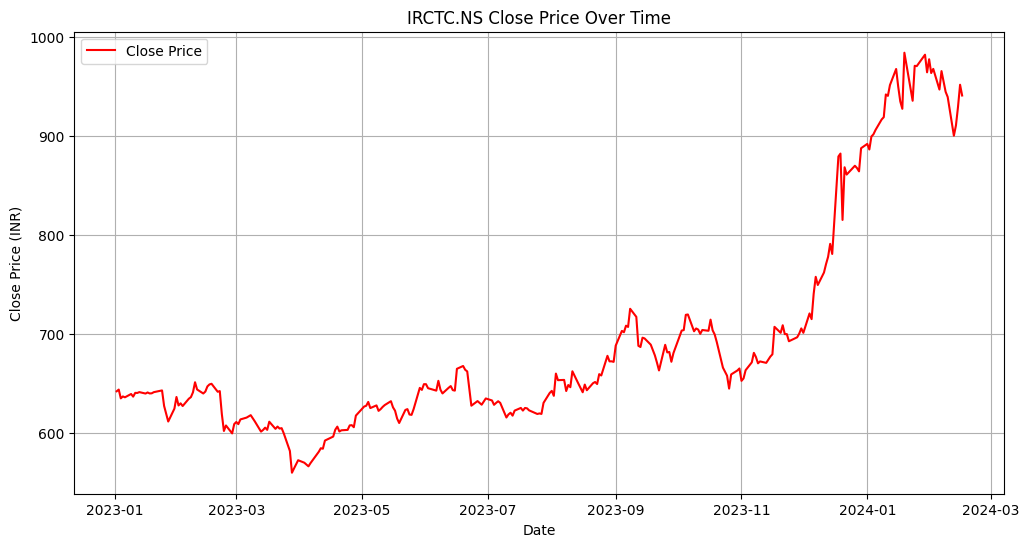

In [86]:
import matplotlib.pyplot as plt

# Plotting the Close price over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], color='red', label='Close Price')
plt.title('IRCTC.NS Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.grid(True)
plt.legend()
plt.show()


### Observation : 

1 - Jan 2023 Market Price will be arround 650

2-  April 2023  Market will going Downfall 

3 - February 2024 Market Will Increase And Price upto - 950

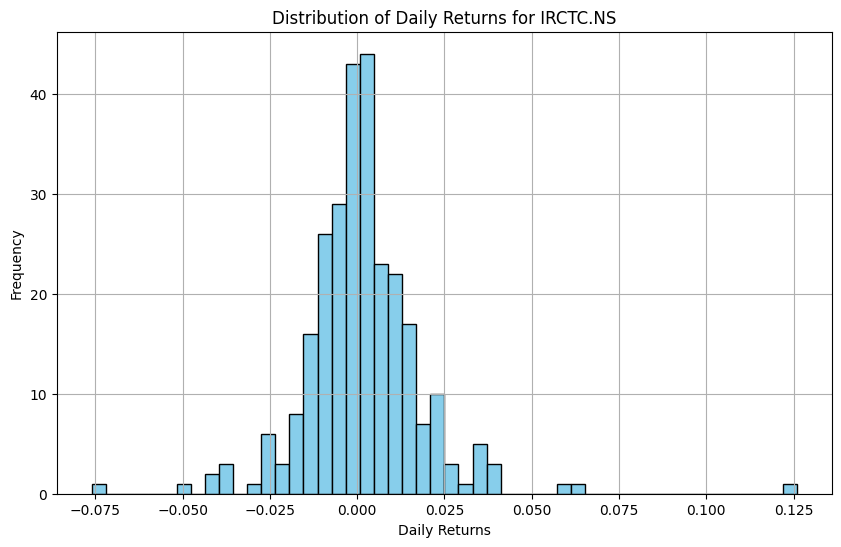

In [87]:
# Calculate daily returns
daily_returns = data['Close'].pct_change()

# Drop the first row since it will have a NaN value due to no previous day
daily_returns = daily_returns.dropna()

# Plot the distribution of daily returns
plt.figure(figsize=(10, 6))
plt.hist(daily_returns, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Daily Returns for IRCTC.NS')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Observation:

1. Histogram chart will Represent Daily return will be 0 or less
2. The Frequency will Max upto 40

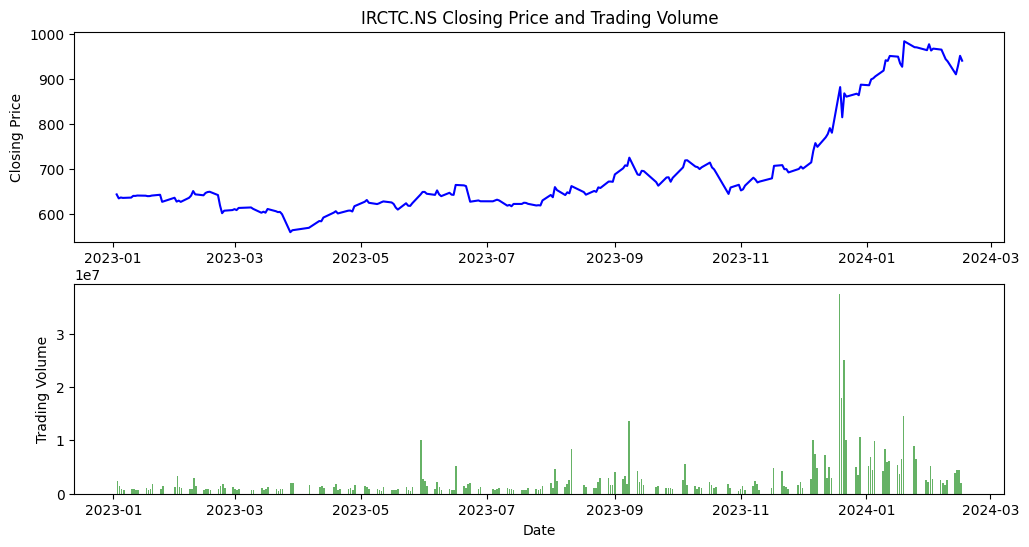

In [94]:
# Plotting trading volume and closing price
plt.figure(figsize=(12, 6))

# Plot closing price
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Close'], color='blue')
plt.title('IRCTC.NS Closing Price and Trading Volume')
plt.ylabel('Closing Price')

# Plot trading volume
plt.subplot(2, 1, 2)
plt.bar(data.index, data['Volume'], color='green', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.show()


## Observation :- 
 1. Table 1 - January 2023 The Closing Price Will  Start 650 and Move upto 970
 2. Table 2 - The trading volume you can buy maximum share Jan 2024

In [89]:
# Calculate descriptive statistics for the stock's price
price_stats = data['Close'].describe()

# Calculate descriptive statistics for the trading volume
volume_stats = data['Volume'].describe()

# Print descriptive statistics
print("Descriptive Statistics for Stock's Price:")
print(price_stats)
print("\nDescriptive Statistics for Trading Volume:")
print(volume_stats)


Descriptive Statistics for Stock's Price:
count    278.000000
mean     690.903775
std      106.803473
min      560.200012
25%      625.699997
50%      647.424988
75%      703.149994
max      983.799988
Name: Close, dtype: float64

Descriptive Statistics for Trading Volume:
count    2.780000e+02
mean     2.699616e+06
std      4.140065e+06
min      5.043900e+05
25%      9.052722e+05
50%      1.328104e+06
75%      2.678489e+06
max      3.749978e+07
Name: Volume, dtype: float64


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


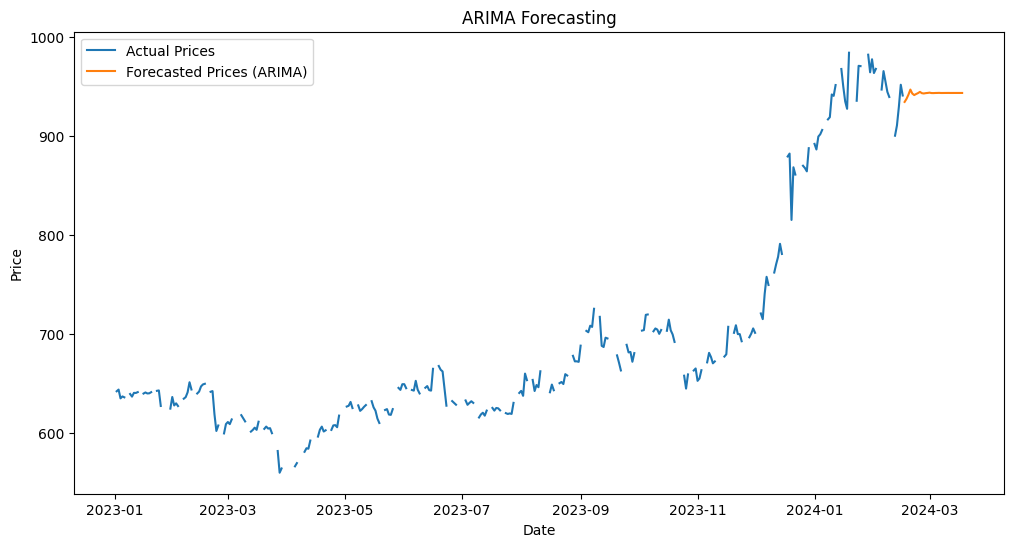

In [90]:
# Assuming 'data' is your DataFrame
data.index = pd.to_datetime(data.index)  # Convert the index to datetime
data = data.asfreq('D')  # Set the frequency to 'D' for daily data

from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(data['Close'], order=(5,1,0))  # Example order, you can tune this
arima_results = model.fit()

# Forecast future prices
forecast_arima = arima_results.predict(start=len(data), end=len(data) + 30, typ='levels')  # Forecasting 30 days ahead

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Actual Prices')
plt.plot(forecast_arima, label='Forecasted Prices (ARIMA)')
plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



### Observation : - 

1. The Trading Price Will Start 652 arround
2. The Forecasted value will Increase upto 952

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


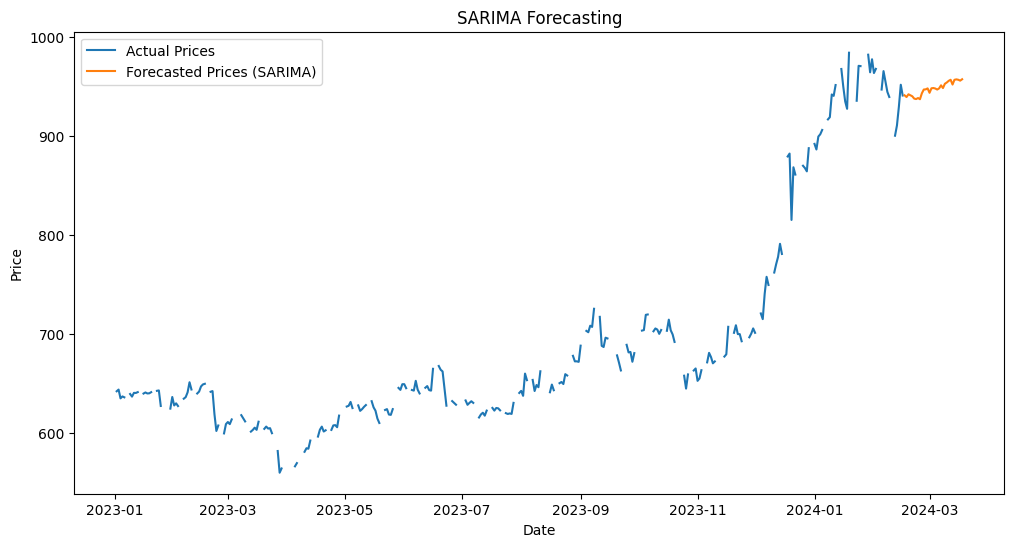

In [91]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
model_sarima = SARIMAX(data['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Example order, you can tune this
sarima_results = model_sarima.fit()

# Forecast future prices
forecast_sarima = sarima_results.predict(start=len(data), end=len(data) + 30, typ='levels')  # Forecasting 30 days ahead

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Actual Prices')
plt.plot(forecast_sarima, label='Forecasted Prices (SARIMA)')
plt.title('SARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


### Obsevation - 
1. The Forecating and Predict Price Higher upto 960 to 972